### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [37]:
import numpy as np
import pandas as pd

processed_data = pd.read_csv('/Users/alikhansainov/Desktop/Karpov/processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


In [38]:
initial_data = pd.read_csv('/Users/alikhansainov/Desktop/Karpov/taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [39]:
initial_data.shape[0] == processed_data.shape[0]


True

In [40]:
### Вернем в датасет колонку pickup_datetime

initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [41]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [42]:
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month


Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

In [43]:
### Создадим первый бинарный признак
### Your code is here
#Добрый день, аномальным днём является день с выбивающимся малым количеством поездок, среди поездок за день среди соседей

processed_data['anomaly'] = (processed_data['date'] == '2016-01-23').astype(int)


In [44]:
### Создадим второй бинарный признак
### Your code is here
top_pairs = processed_data.groupby(['day_of_week', 'hour'])['log_trip_duration'].mean().nlargest(10).index
processed_data['traffic_jam'] = processed_data.apply(lambda x: (x['day_of_week'], x['hour']) in top_pairs, axis = 1).astype(int)

In [45]:
processed_data

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly,traffic_jam
id,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0,0
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0,0
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0,0
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
id2376096,1,1053.529749,0,1.226296,6.658011,2016-04-08 13:31:04,2016-04-08,4,13,4,0,0
id1049543,0,930.399753,0,6.056935,6.486161,2016-01-10 07:35:15,2016-01-10,6,7,1,0,0
id2304944,1,930.399753,0,7.832952,6.639876,2016-04-22 06:57:41,2016-04-22,4,6,4,0,0


Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [46]:
processed_data = processed_data.drop(['pickup_datetime', 'date'], axis=1)


<Axes: >

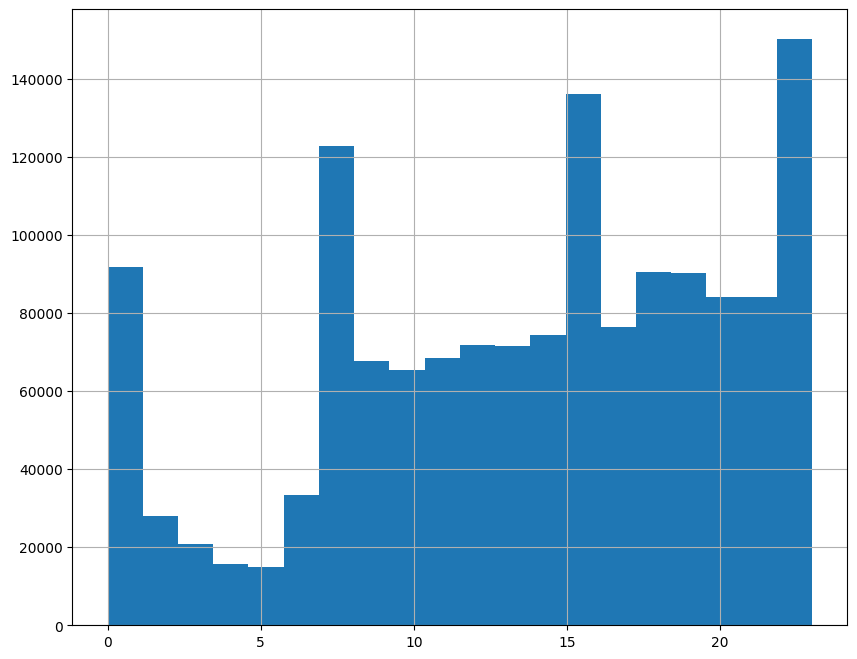

In [47]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches((10,8))
processed_data[processed_data['passenger_count'] > 900]['hour'].hist(bins=20)


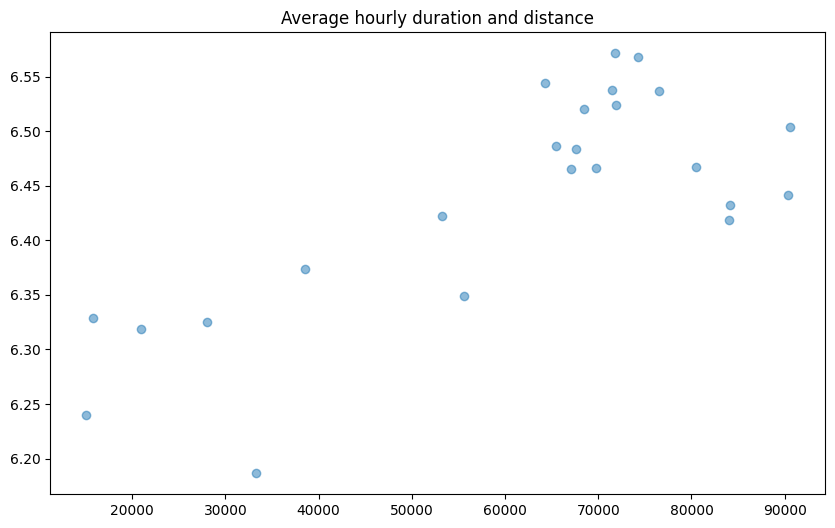

In [48]:
#plt.scatter(processed_data['hour']['hour'])
plt.figure(figsize=(10,6))
plt.scatter(processed_data.groupby('hour')['hour'].count(), 
            processed_data.groupby('hour')['log_trip_duration'].mean(), 
            alpha=0.5)
plt.title('Average hourly duration and distance')
plt.show()


In [49]:
processed_data.head(5)

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,day_of_week,hour,month,anomaly,traffic_jam
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,17,3,0,0
id2377394,0,930.399753,0,1.807119,6.498282,6,0,6,0,0
id3858529,1,930.399753,0,6.392080,7.661527,1,11,1,0,1
id3504673,1,930.399753,0,1.487155,6.063785,2,19,4,0,0
id2181028,1,930.399753,0,1.189925,6.077642,5,13,3,0,0


In [50]:
encoded_data = pd.get_dummies(processed_data, columns=['day_of_week', 'hour', 'month'], drop_first=True)
output = encoded_data.head(5)
result = output.to_csv('/Users/alikhansainov/Desktop/Karpov/tmp', sep=',')
output

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
id2377394,0,930.399753,0,1.807119,6.498282,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
id3858529,1,930.399753,0,6.392080,7.661527,0,1,True,False,False,...,False,False,False,False,False,False,False,False,False,False
id3504673,1,930.399753,0,1.487155,6.063785,0,0,False,True,False,...,True,False,False,False,False,False,False,True,False,False
id2181028,1,930.399753,0,1.189925,6.077642,0,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False


Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

In [51]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора

### Your code is here

# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# from sklearn.feature_selection import SequentialFeatureSelector
# sfs = SequentialFeatureSelector(model, n_features_to_select=5)
# X = output.drop('log_trip_duration', axis =1)
# y = output['log_trip_duration']
# sfs.fit(X, y)
# sfs.get_support()
# selected_features_names = sfs.get_feature_names_out()
# selected_x = X[selected_features_names]
# selected_x


In [52]:
### Перечислите фичи, которые окажутся наиболее желанными
### Your code is here


In [53]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?

### Your code is here

# import pandas as pd
# from sklearn.model_selection import KFold
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_validate
# from sklearn.linear_model import LinearRegression
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# model = LinearRegression()
# X_train, X_test, y_train, y_test = train_test_split(selected_x, y, test_size=0.3, random_state=42)
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
# error = mean_squared_error(y_test, y_pred)
# print(round((error), 3))
